# 0. Import Dependencies And Pretrained Model

In [35]:
#%pip install tensorflow-hub

In [5]:
# pip install tensorflow-hub
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# 1. Preproccess Image and Load

In [7]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [21]:
content_image = load_image('ta.jpg')
style_image = load_image('VanGogh.jpg')
style_image_2 = load_image('autumn.png')
style_image_3 = load_image('pichasso.jpg')

# 2. Visualize Output

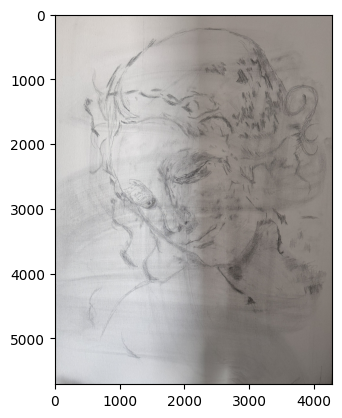

In [22]:
plt.imshow(np.squeeze(content_image))
plt.show()

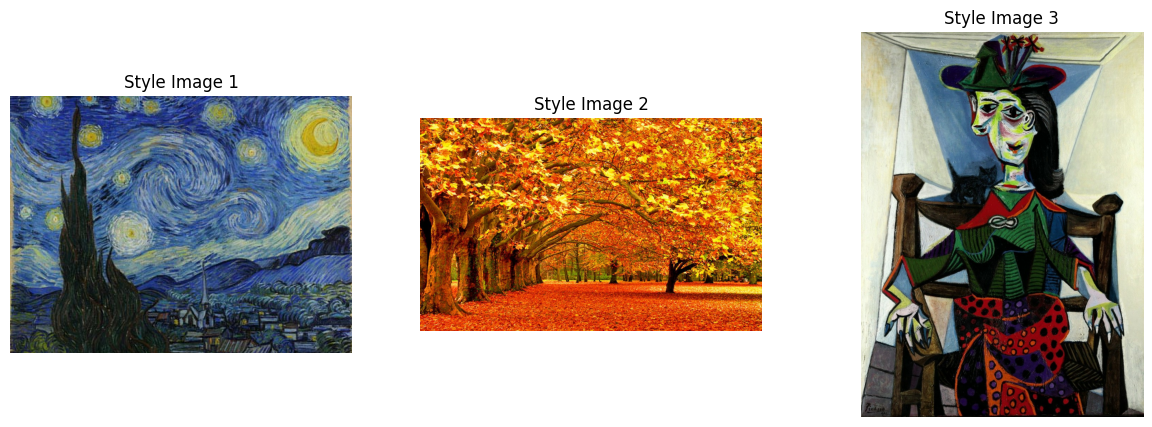

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 satır, 3 sütunlu bir şekil oluştur

# Her bir style imajını alt çizimlere ekleyin
axes[0].imshow(np.squeeze(style_image))
axes[0].set_title("Style Image 1")
axes[0].axis('off')  # Eksenleri gizle

axes[1].imshow(np.squeeze(style_image_2))
axes[1].set_title("Style Image 2")
axes[1].axis('off')

axes[2].imshow(np.squeeze(style_image_3))
axes[2].set_title("Style Image 3")
axes[2].axis('off')

plt.show()

# 3. Stylize Image

In [25]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

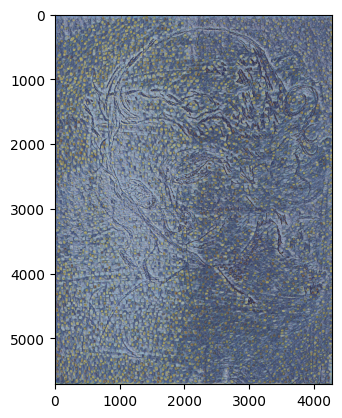

In [26]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [27]:
cv2.imwrite('dij_VanGogh.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True

In [28]:
stylized_image_2 = model(tf.constant(content_image), tf.constant(style_image_2))[0]

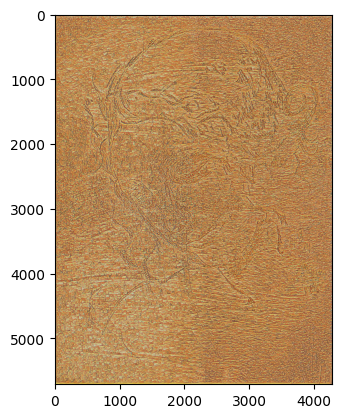

In [29]:
plt.imshow(np.squeeze(stylized_image_2))
plt.show()

In [30]:
cv2.imwrite('dij_autumn.jpg', cv2.cvtColor(np.squeeze(stylized_image_2)*255, cv2.COLOR_BGR2RGB))

True

In [31]:
stylized_image_3 = model(tf.constant(content_image), tf.constant(style_image_3))[0]

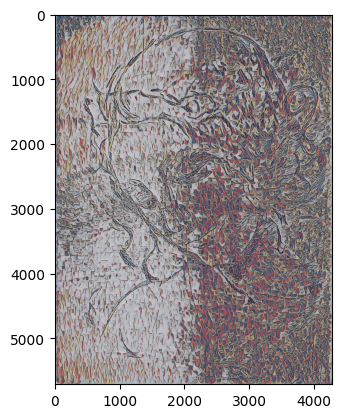

In [32]:
plt.imshow(np.squeeze(stylized_image_3))
plt.show()

In [33]:
cv2.imwrite('dij_pichasso.jpg', cv2.cvtColor(np.squeeze(stylized_image_3)*255, cv2.COLOR_BGR2RGB))

True